# Imports

In [1]:
import sys, os
# from scipy.stats import norm

In [2]:
sys.path.append(os.path.abspath(os.path.join('../utils')))
from ordinal_model.OrdinalRegression import OrdinalRegression, softplus, softplus_inv, plot_model
import autograd.numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from autograd import grad, value_and_grad

# Ordinal Regression Testing

## Sequence State 2--Gaussian perfect separation

### Toy Data

In [ ]:
state_2_df = pd.read_csv('../toydata/simulated_data/features_from_state2.csv')
state_2_df

In [ ]:
from IPython.display import Image
Image(filename='../toydata/simulated_data/features_from_state_2.png') 

In [ ]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = state_2_df[['temperature_1', 'temperature_2']].values
y = state_2_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

## Model

In [ ]:
clf = OrdinalRegression(noise_variance = 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

In [ ]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

In [ ]:
clf.grid_search_variance()

## Sequence State 2--Gaussian with label noise

### Toy Data

In [ ]:
state_2_with_noise_df = pd.read_csv('../toydata/simulated_data/features_from_state2_with_noise.csv')
state_2_with_noise_df

In [ ]:
from IPython.display import Image
Image(filename='../toydata/simulated_data/features_from_state2_with_noise.png') 

In [ ]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = state_2_with_noise_df[['temperature_1', 'temperature_2']].values
y = state_2_with_noise_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

### Model

In [ ]:
clf = OrdinalRegression(noise_variance = None, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

In [ ]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## Crescent Shapes

### Toy Data

In [ ]:
cresent_df = pd.read_csv('../toydata/ordinal_data/crescent_shapes_4_labels.csv')
cresent_df

In [ ]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/crescent_shapes_4_labels.png') 

In [ ]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = cresent_df[['x1', 'x2']].values
y = cresent_df['label'].values.astype(int)
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

### Model

In [ ]:
clf = OrdinalRegression(noise_variance = 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

In [ ]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## Concentric Circles

### Toy Data, Point Density Factor = 1

In [ ]:
circles_df = pd.read_csv('../toydata/ordinal_data/concentric_circles_4_labels_1.0_densityfactor.csv')
circles_df

In [ ]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/concentric_circles_4_labels_1.0_densityfactor.png') 

In [ ]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = circles_df[['x1', 'x2']].values
y = circles_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

### Model

In [ ]:
clf = OrdinalRegression(noise_variance = 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

In [ ]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## Concentric Semi Circles

### Toy Data, Point Density Factor = 1

In [ ]:
semi_circles_df = pd.read_csv('../toydata/ordinal_data/concentric_semi_circles_4_labels_1_densityfactor.csv')
semi_circles_df

In [ ]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/concentric_semi_circles_4_labels_1_densityfactor.png') 

In [ ]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = semi_circles_df[['x1', 'x2']].values
y = semi_circles_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

### Model

In [ ]:
clf = OrdinalRegression(noise_variance = 10, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

In [ ]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## Stacked Gaussians

### Toy Data, Point Density Factor = 1, Mean scale = 4

In [39]:
stacked_gaussian_df = pd.read_csv('../toydata/ordinal_data/stacked_gaussian_4_labels_1_densityfactor.csv')
stacked_gaussian_df

,x1,x2,ordinal_label
0,0.715279,1.883148,0
1,-0.008384,-2.185526,0
2,-0.720086,0.878702,0
3,0.108549,0.375490,0
4,-0.174600,0.006069,0
...,...,...,...
1995,1.150269,13.570840,3
1996,0.488751,12.953526,3
1997,-1.498064,12.627589,3
1998,1.287536,13.271711,3


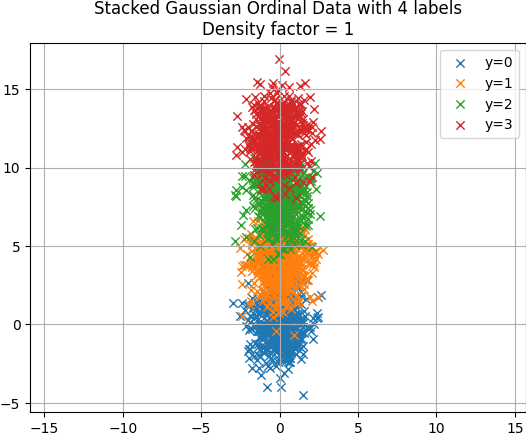

In [40]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/stacked_gaussian_4_labels_1_densityfactor.png') 

In [41]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = stacked_gaussian_df[['x1', 'x2']].values
y = stacked_gaussian_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

X: (2000, 2)
[[ 7.15278974e-01  1.88314769e+00]
 [-8.38384993e-03 -2.18552605e+00]
 [-7.20085561e-01  8.78701761e-01]
 ...
 [-1.49806385e+00  1.26275894e+01]
 [ 1.28753594e+00  1.32717106e+01]
 [-5.48980805e-02  1.09671385e+01]]
y: (2000,)
[0 0 0 ... 3 3 3]


### Model

[[5.18852131e-01 4.81130027e-01 1.78421709e-05 0.00000000e+00]
 [9.99990839e-01 9.16118805e-06 0.00000000e+00 0.00000000e+00]
 [8.71308751e-01 1.28691160e-01 8.98936310e-08 0.00000000e+00]
 ...
 [1.65223868e-28 2.15555516e-12 3.19207749e-03 9.96807923e-01]
 [2.87349719e-32 7.89937544e-15 2.49148036e-04 9.99750852e-01]
 [4.89704601e-21 7.53344340e-08 1.46280158e-01 8.53719766e-01]]
[0 0 0 ... 3 3 3]


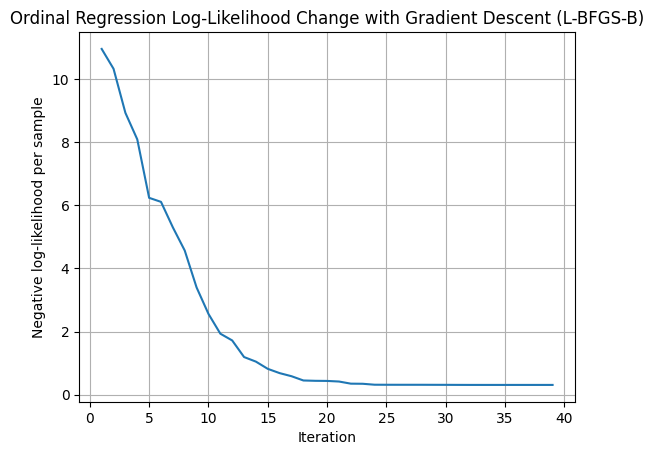

In [42]:
clf = OrdinalRegression(noise_variance = 0.5, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

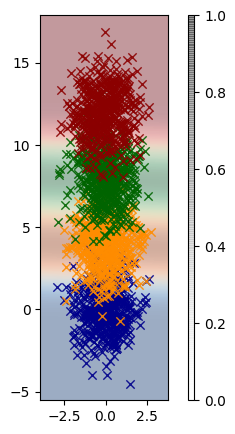

In [43]:
plot_model(clf)

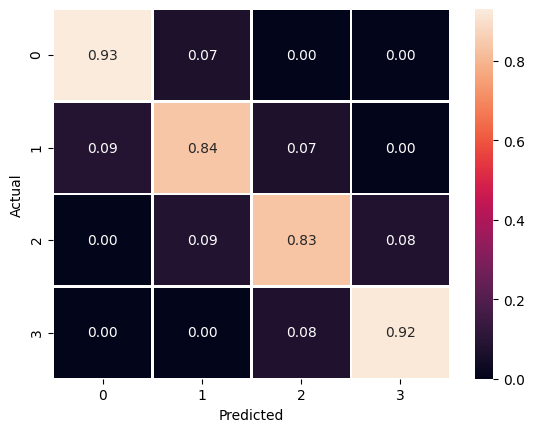

In [44]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

In [45]:
min_variance = clf.find_global_minimum_variance(iter=100)

### Toy Data, Point Density Factor = 0.5, Mean scale = 2

In [4]:
stacked_gaussian_df = pd.read_csv('../toydata/ordinal_data/stacked_gaussian_4_labels_0.5_densityfactor_2_meanscale.csv')
stacked_gaussian_df

,x1,x2,ordinal_label
0,0.715279,1.883148,0
1,-0.008384,-2.185526,0
2,-0.720086,0.878702,0
3,0.108549,0.375490,0
4,-0.174600,0.006069,0
...,...,...,...
995,0.293705,6.755525,3
996,-1.303890,3.729588,3
997,0.633243,6.732859,3
998,0.372233,7.630058,3


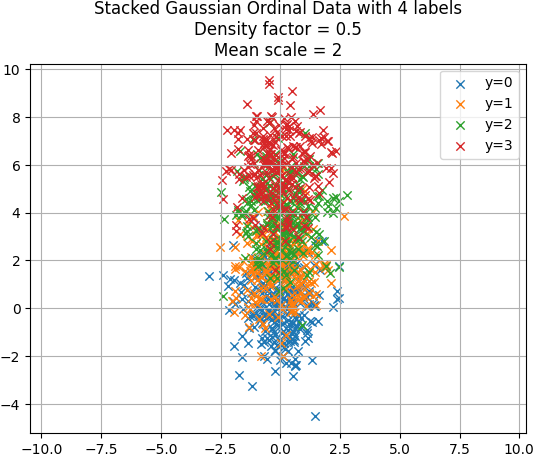

In [5]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/stacked_gaussian_4_labels_0.5_densityfactor_2_meanscale.png') 

In [6]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = stacked_gaussian_df[['x1', 'x2']].values
y = stacked_gaussian_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

X: (1000, 2)
[[ 0.71527897  1.88314769]
 [-0.00838385 -2.18552605]
 [-0.72008556  0.87870176]
 ...
 [ 0.63324275  6.73285912]
 [ 0.37223338  7.6300583 ]
 [ 1.71027507  6.86584687]]
y: (1000,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

### Model

[[2.22326047e-01 5.52544592e-01 2.15612282e-01 9.51707817e-03]
 [9.84317492e-01 1.55620626e-02 1.20373589e-04 7.13906909e-08]
 [4.78492068e-01 4.50102884e-01 7.02808095e-02 1.12423787e-03]
 ...
 [1.07699102e-05 3.16599111e-03 1.24158506e-01 8.72664733e-01]
 [4.92231528e-07 3.68084795e-04 3.67218287e-02 9.62909594e-01]
 [7.26983660e-06 2.42246845e-03 1.07608151e-01 8.89962110e-01]]
[1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 2 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 2 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 2 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 2 1 1 0 0 1
 0 0 1 0 0 1 0 2 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 2 0 0 0 0 0 2 2 2 1 1 1 1 1 0
 1 1 0 1 0 0 0 0 1 0 1 1 1 1 2 2 1 1 1 1 1 1 0 1 2 2 1 1 2 0 1 2 0 3 2 2 0
 1 1 0 0 1 1 2 2

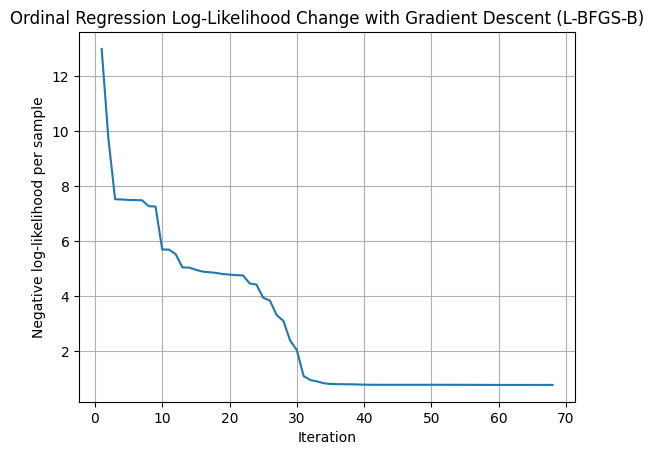

In [36]:
clf = OrdinalRegression(noise_variance = 0.001, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

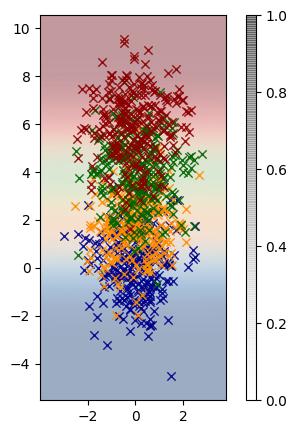

In [37]:
plot_model(clf)

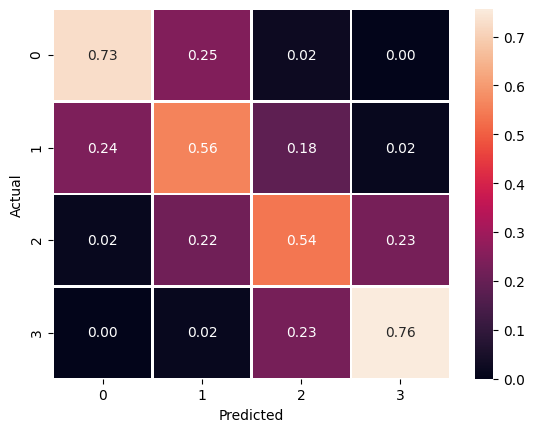

In [38]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

In [10]:
min_variance = clf.find_global_minimum_variance()

In [32]:
clf.grid_search_variance()

(0.00010139254075588143, 787.2384348625876)

## Concentric Semi Circles

### Toy Data, Point Density Factor = 1

In [ ]:
semi_circles_df = pd.read_csv('../toydata/ordinal_data/concentric_semi_circles_4_labels_1_densityfactor.csv')
semi_circles_df

In [ ]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/concentric_semi_circles_4_labels_1_densityfactor.png') 

In [ ]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = semi_circles_df[['x1', 'x2']].values
y = semi_circles_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

### Model

In [ ]:
clf = OrdinalRegression(noise_variance = 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

In [ ]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

# Misc. Testing

In [ ]:
X = np.array(
    [
        [-80,-90,-100],
        [4,5,6],
        [80,90,100],
        [-81,-93,-99],
        [4.2,5.1,6.3],
        [81,93,99],
        [-87,-94,-98],
        [4.1,5.2,6.5],
        [87,94,98],
    ]
)
y = np.array(
    [
        0,
        1,
        2,
        0,
        1,
        2,
        0,
        1,
        2,
    ]
)
w_inits = []
for i in range(100):
    w_inits.append(np.random.rand(3) * np.random.randint(0,10))

In [ ]:
clf = OrdinalRegression()
clf.set_params(R = 3, N = 3, cut_points  = np.array([-np.inf, -3, 3, np.inf]))

In [ ]:
# for w in w_inits:
#     print(clf.log_likelihood(w, X, y))

In [ ]:
clf.fit(X, y)

In [ ]:
best_w = clf.w

In [ ]:
clf.predict(X)

## Softplus

In [ ]:
test_arr = np.absolute(np.random.normal(size=3))
print(test_arr)
inverse_arr = softplus_inv(test_arr)
print(inverse_arr)
recovered = softplus(inverse_arr)
print(recovered)

In [ ]:
softplus_inv(0.5969)

In [ ]:
softplus(np.array([1,2,3]))

In [ ]:
arr = np.array([1,2,10, 50])

In [ ]:
arr.shape

In [ ]:
softplus(arr)

In [ ]:
np.array(1)[np.newaxis].shape